# Refinement Architecture: updated models (carVsBus and trainVsSubway)

**Rational**
Deal with confusion between dependent concepts such as _train_ and _subway_ activities depicted in the following confusion matrix

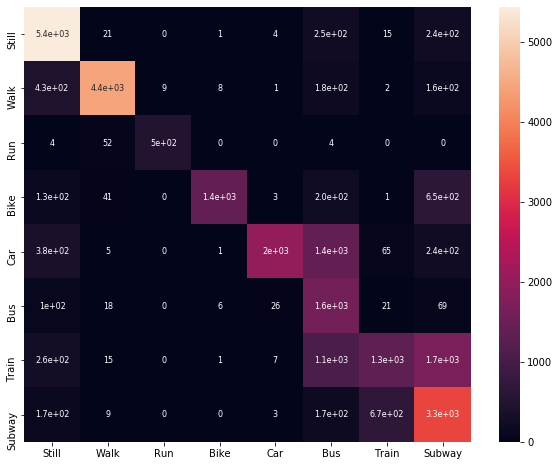

In [1]:
import tensorflow as tf
import stjohns as ag

#################################################
updated @12:58 (june 18) version of stjohns_7.py:
+ updated hyperparameters with best so-far -- arch#184 (SaFpz) gave 66.54% on validation (tehran_1)
+ used only Pressure, *_m modalities
#################################################
updated @16:38 (june 18) version of stjohns_8.py:
+ models' weights are saved every epoch
+ dropout after each layer (even after Conv1d)
+ switched back to 25 epochs
#################################################
updated @18:15 (june 18) version of stjohns_9.py:
+ switched back to dropout only after dense layers (not after Conv1d)
#################################################
updated @20:44 (june 18) version of stjohns_10.py:
+ reduce dropout for dense layers (view_Position) from ~0.8 to ~0.5 but keep the last dropout is kept @0.8
+ as val_acc is above tr_acc, increase number of epochs from 25 to 50
#################################################
updated @15:55 (june 19) version of stjohns_11.py

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  4


### Loading models

In [3]:
# StillVsAll model (initial:stjohns_13, current:stjohns_24)
checkpoint_path = 'stjohns_24'
epoch = 50

#map original labels to the new learning problem
new_classes = {
    0: ['still'],
    1: ['walk', 'run', 'bike', 'car', 'bus', 'train', 'subway']
}
num_classes = len(list(new_classes.keys()))

StillVsAll = ag.stjohns(ag.dict_of_params(ag.params), num_classes=num_classes)
StillVsAll.load_weights(checkpoint_path+'/cp.{epoch:04d}.ckpt'.format(epoch=epoch))

circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m


In [4]:
# GroupedActivities model (initial:stjohns_16, current:stjohns_25)
checkpoint_path = 'stjohns_25'
epoch = 50

#map original labels to the new learning problem
new_classes = {
    0: ['walk'],
    1: ['run'],
    2: ['bike'],
    3: ['car', 'bus'],
    4: ['train', 'subway']
}
num_classes = len(list(new_classes.keys()))

groupedActivities = ag.stjohns(ag.dict_of_params(ag.params), num_classes=num_classes)
groupedActivities.load_weights(checkpoint_path+'/cp.{epoch:04d}.ckpt'.format(epoch=epoch))

circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m


In [5]:
# BusVsCar model (initial:stjohns_14, current:stjohns_20)
checkpoint_path = 'stjohns_20'
epoch = 40

#map original labels to the new learning problem
new_classes = {
    0: ['car'],
    1: ['bus']
}
num_classes = len(list(new_classes.keys()))

carVsBus = ag.stjohns(ag.dict_of_params(ag.params), num_classes=num_classes)
carVsBus.load_weights(checkpoint_path+'/cp.{epoch:04d}.ckpt'.format(epoch=epoch))

circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m


In [6]:
# TrainVsSubway model (initial:stjohns_15, current:stjohns_19)
checkpoint_path = 'stjohns_19'
epoch = 30

#map original labels to the new learning problem
new_classes = {
    0: ['train'],
    1: ['subway']
}
num_classes = len(list(new_classes.keys()))

trainVsSubway = ag.stjohns(ag.dict_of_params(ag.params), num_classes=num_classes)
trainVsSubway.load_weights(checkpoint_path+'/cp.{epoch:04d}.ckpt'.format(epoch=epoch))

circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m


### Refinment Predictions

In [7]:
valid_dict, valid_labels = ag.load_data(what='validation', refinedSampleId=None)

generated/0.2/validation/validation_Torso_Pressure.mmap exists, loading ...
generated/0.2/validation/validation_Torso_Acc_m.mmap exists, loading ...
generated/0.2/validation/validation_Torso_Gyr_m.mmap exists, loading ...
generated/0.2/validation/validation_Torso_Mag_m.mmap exists, loading ...
generated/0.2/validation/validation_Torso_Ori_m.mmap exists, loading ...
generated/0.2/validation/validation_Torso_Gra_m.mmap exists, loading ...
generated/0.2/validation/validation_Torso_LAcc_m.mmap exists, loading ...
generated/0.2/validation/validation_Hips_Pressure.mmap exists, loading ...
generated/0.2/validation/validation_Hips_Acc_m.mmap exists, loading ...
generated/0.2/validation/validation_Hips_Gyr_m.mmap exists, loading ...
generated/0.2/validation/validation_Hips_Mag_m.mmap exists, loading ...
generated/0.2/validation/validation_Hips_Ori_m.mmap exists, loading ...
generated/0.2/validation/validation_Hips_Gra_m.mmap exists, loading ...
generated/0.2/validation/validation_Hips_LAcc_m.mm

In [11]:
print(valid_dict['Hips_Acc_m'].shape)
print(valid_labels.shape)

(28789, 500)
(28789,)


In [12]:
# make predictions
import numpy as np
from dataset import DataReader
import time


#y_pred = np.asarray(model.predict(valid_dict, verbose=1))
#y_true = valid_labels
#y_pred_class = np.argmax(y_pred, axis=1)

y_true = valid_labels
y_pred_class = np.zeros_like(y_true) - 1

# print((valid_dict['Torso_Acc_m'][0])[np.newaxis, :].shape)


start_time = time.time()
for i, label in enumerate(y_true):
    if i % 100 == 0:
        print(i)
    example = {
        pos+'_'+m: (valid_dict[pos+'_'+m][i])[np.newaxis, :]
        for m in DataReader.channels.values()
        for pos in DataReader.smartphone_positions
    }
    
    y_pred = StillVsAll.predict(example)
    pred_class = np.argmax(y_pred, axis=1)
    
    if pred_class == 0:  # still
        #print('still')
        y_pred_class[i] = DataReader.inv_coarselabel_map['still']
        
    else:  # other
        y_pred = groupedActivities.predict(example)
        pred_class = np.argmax(y_pred, axis=1)
        
        if pred_class == 0:  # walk
            #print('walk')
            y_pred_class[i] = DataReader.inv_coarselabel_map['walk']
        elif pred_class == 1:  # run
            #print('run')
            y_pred_class[i] = DataReader.inv_coarselabel_map['run']
        elif pred_class == 2:  # bike
            #print('bike')
            y_pred_class[i] = DataReader.inv_coarselabel_map['bike']
        elif pred_class == 3:  # car-bus
            y_pred = carVsBus.predict(example)
            pred_class = np.argmax(y_pred, axis=1)
            
            if pred_class == 0:  # car
                #print('car')
                y_pred_class[i] = DataReader.inv_coarselabel_map['car']
            else:  # bus
                #print('bus')
                y_pred_class[i] = DataReader.inv_coarselabel_map['bus']
        else:  # train-subway
            y_pred = trainVsSubway.predict(example)
            pred_class = np.argmax(y_pred, axis=1)
            
            if pred_class == 0:  # train
                #print('train')
                y_pred_class[i] = DataReader.inv_coarselabel_map['train']
            else:  # subway
                #print('subway')
                y_pred_class[i] = DataReader.inv_coarselabel_map['subway']
                
print("--- %s seconds ---" % (time.time() - start_time))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [18]:
print(np.bincount(y_true))
print(np.bincount(y_pred_class-1))

[5964 5230  555 2406 4094 1836 4362 4342]
[5540 4687  478 1605 3066 5027 3770 4616]


In [19]:
# confusion matrix
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sn

labels = ['Still', 'Walk', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']

def plot_confusion_matrix(y_true, y_pred_class):
    fig, ax = plt.subplots(figsize=(10,8))
    confusion_mat = sklearn.metrics.confusion_matrix(y_true, y_pred_class-1, normalize=True)
    sn.heatmap(confusion_mat, cmap="YlGnBu", annot=True, annot_kws={"size": 8})
    ax.xaxis.set_ticklabels(labels);
    ax.yaxis.set_ticklabels(labels);
    plt.savefig('confusion_matrix_{}.svg'.format(checkpoint_path), format='svg')
    plt.show()

accuracy = 0.7064851158428567
f1 score = 0.7127402906337876


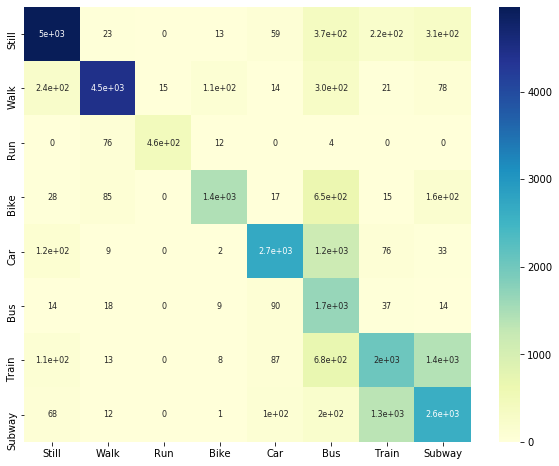

In [22]:
print('accuracy = {}'.format(sklearn.metrics.accuracy_score(y_true, y_pred_class-1)))
print('f1 score = {}'.format(sklearn.metrics.f1_score(y_true, y_pred_class-1, average='macro')))
plot_confusion_matrix(y_true, y_pred_class)

In [23]:
true_still = np.argwhere(y_true == 1)[:, 0]
predicted_train = np.argwhere(y_pred_class == 7)[:, 0]

In [24]:
print(true_still)

[   58    59    60 ... 28786 28787 28788]


In [25]:
print(predicted_train)

[  795   818   820 ... 28592 28596 28598]


In [26]:
confused = []
for still in true_still:
    for train in predicted_train:
        if still == train:
            confused.append(still)
            print('{} = {}'.format(still, train))

1811 = 1811
3371 = 3371
3409 = 3409
3478 = 3478
5255 = 5255
8934 = 8934
12645 = 12645
20487 = 20487
20490 = 20490
20840 = 20840
20843 = 20843
20845 = 20845
23601 = 23601
25140 = 25140
25278 = 25278
26199 = 26199
26201 = 26201
26203 = 26203
27800 = 27800
27924 = 27924
27926 = 27926


In [27]:
print(len(confused))

21
